### Import the necessary libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings 
warnings.filterwarnings('ignore')

### Load the Cars data dataset into a pandas DataFrame

In [52]:
df = pd.read_csv('cars_data.csv')

### Explore the dataset

In [53]:
df.head() 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [54]:
df.shape

(11914, 16)

There are total 11914 records and 15 attributes on which price of cars models depend.

In [55]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [56]:
df.describe() 

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [57]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### Preprocess the data

In [58]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Replace the missing values by taking mean in columns 'Engine HP' & 'Engine Cylinders'

In [59]:
mean_value = df['Engine HP'].mean()
df['Engine HP'].fillna(mean_value, inplace=True)

In [60]:
mean_value = df['Engine Cylinders'].mean()
df['Engine Cylinders'].fillna(mean_value, inplace=True)

In [61]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

#### heatmap showing the correlation coefficients between all pairs of features in the dataset.

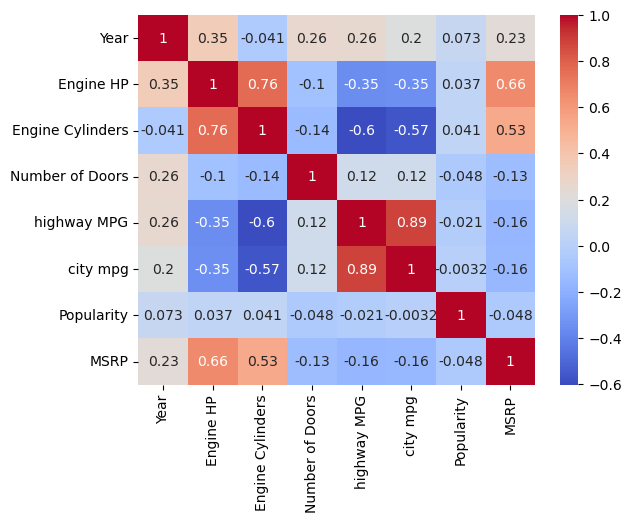

In [62]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True);

### here the 'Year', 'Engine HP', 'Engine Cylinders' columns are highlh correlated with column 'MSRP' 
### and other columns are lying in negative so, we are considering that columns for our further process

In [63]:
data = df[['Year', 'Engine HP', 'Engine Cylinders', 'MSRP']]
data

,Year,Engine HP,Engine Cylinders,MSRP
0,2011,335.0,6.0,46135
1,2011,300.0,6.0,40650
2,2011,300.0,6.0,36350
3,2011,230.0,6.0,29450
4,2011,230.0,6.0,34500
...,...,...,...,...
11909,2012,300.0,6.0,46120
11910,2012,300.0,6.0,56670
11911,2012,300.0,6.0,50620
11912,2013,300.0,6.0,50920


In [64]:
X = data.drop(['MSRP'], axis = 1)
Y = data['MSRP']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Train a linear regression model on the training data

In [65]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [66]:
predictions = model.predict(X_test)
predictions

array([49605.04198117, 10675.78218595, 42455.9282045 , ...,
        3900.51631523, 13345.99972244, 44608.92158711])

<AxesSubplot:xlabel='MSRP', ylabel='Density'>

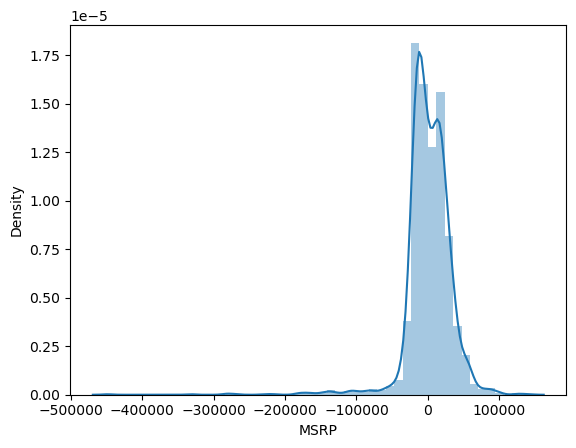

In [67]:
sns.distplot(predictions-Y_test)

### Evaluate the model's performance on the testing data

In [68]:
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared score: {r2:.3f}")

R-squared score: 0.549


Here r squared meaning would be that the model explains 54% of the fitted data in the regression model

### we are having medium R-squared score which is good for model

<AxesSubplot:xlabel='MSRP'>

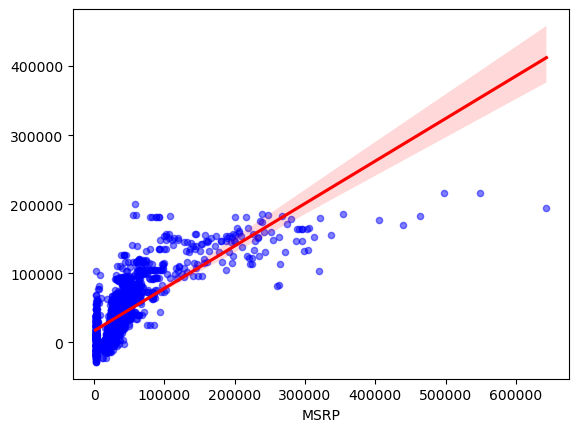

In [69]:
sns.regplot(x = Y_test, y = Y_pred, color = 'blue', scatter_kws = {'s': 20, 'alpha': 0.5}, line_kws = {'color': 'red'})

### Here the data is not appropriate for our regression plot 
### in this data we having many outliers so while ploting we see that the scattered points are spread over the plot
### And it not possible to conclude 

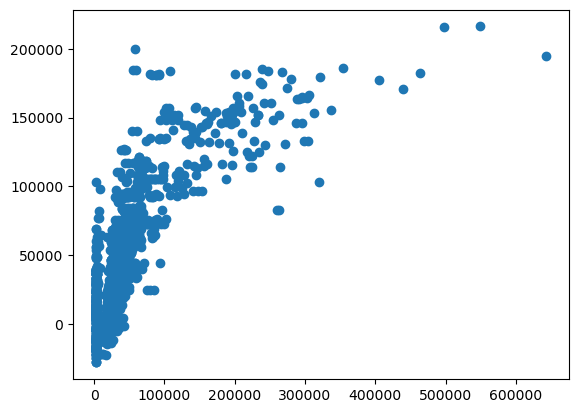

In [70]:
plt.scatter(Y_test,Y_pred)
plt.plot()